## Observations and Insights (Eric Roberts)

1.  Both Ramicane and Capomulin are promising treatments in that they reduce tumor size.  Capomulin reduces tumor size by 19%.  Ramicane does it by 22%.
2.  Interestingly, these drugs are also the most studied.
3.  The tumor volume and the mouse's weight are heavily correlated.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mc_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mc_db.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
gd = mca_db.mean()['Tumor Volume (mm3)']
ge = mca_db.median()['Tumor Volume (mm3)']
gf = mca_db.var()['Tumor Volume (mm3)']
gg = mca_db.sem()['Tumor Volume (mm3)']
gx_db = pd.merge(gd, ge, how="left", on=["Drug Regimen"])
gy_db = pd.merge(gf, gg, how="left", on=["Drug Regimen"])
gxx = pd.merge(gx_db, gy_db, how="left", on=["Drug Regimen"])

gxx = gxx.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)","Tumor Volume (mm3)_x_y": "Variance Tumor Volume (mm3)","Tumor Volume (mm3)_y_y": "SEM Tumor Volume (mm3)"})
gxx.head(20)


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar plots

In [3]:
bar_title = "Data Points per Regimen"
x_label = "Drug Regimen"
y_label = "Data Points"

[Text(0, 0.5, 'Data Points'), Text(0.5, 0, 'Drug Regimen')]

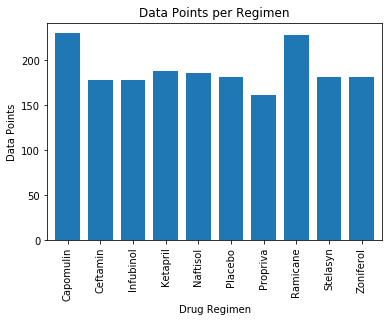

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
datas = mca_db.count()

#let's just pick the first column, rename that and plot.
column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.bar(y='Number of Data Points',title=bar_title,legend=False, width = 0.75)
ax.set(xlabel=x_label, ylabel=y_label)

Text(0, 0.5, 'Data Points')

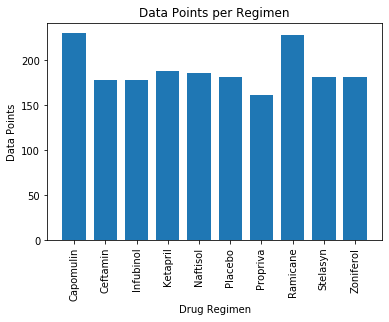

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# https://pythonspot.com/matplotlib-bar-chart/
x_axis = np.arange(len(datas.index))
tick_locations = [value for value in x_axis]
f, axe = plt.subplots()

axe.bar(x_axis, datas['Number of Data Points'], width = 0.75)
plt.xticks(tick_locations, datas.index, rotation="vertical")

axe.set_title(bar_title)
axe.set_xlabel(x_label)
axe.set_ylabel(y_label)

## Pie plots

In [6]:
pie_title = "Gender of Mice among Samples"

In [14]:





#mouse_metadata.head()
print (124/(124+125))

0.4979919678714859


[Text(0, 0.5, '')]

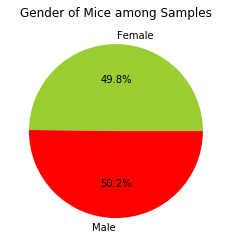

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mcg_db = mouse_metadata.groupby(['Sex']) #
datas = mcg_db.count()

column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.pie(y='Number of Data Points',autopct="%1.1f%%",title = pie_title, legend=False, colors = ["yellowgreen", "red"])
ax.set(ylabel="")

Text(0.5, 1.0, 'Gender of Mice among Samples')

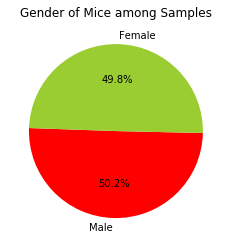

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['Male','Female']

# The values of each section of the pie chart
sizes = [datas.loc['Male']['Number of Data Points'], datas.loc['Female']['Number of Data Points']]

plt.pie(sizes, labels=labels, autopct="%1.1f%%",startangle=178, colors = ["red", "yellowgreen"])
plt.title(pie_title)

## Quartiles, outliers and boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# How do we find the "most promising?"  The one with the lowest mean tumors.
top_x = 4
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen','Timepoint'])
gd = mca_db.mean()

drugs = gd.index.levels[0]
timepoints = gd.index.levels[1]
end_size = []

#let's make a dataframe, a dictionary of lists.  make the list:
for drug in drugs:
    end_size.append(gd.loc[drug,timepoints.max()]['Tumor Volume (mm3)'])

end = pd.DataFrame({"Size": end_size},index = drugs)
end = end.sort_values(by=['Size'])

most_promising =(end.index[0:top_x])
end.head(4)

,Size
Drug Regimen,
Ramicane,34.955595
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562


In [19]:
#now we have the four most promising treatments, let's calculate the final tumor volume.  let's group by the drug and then the mouse.
mcm_db = mc_db.copy()
mcm_db = mcm_db.groupby(['Drug Regimen','Mouse ID']) #let's group by the drug and then the mouse.
gm= mcm_db.max() #the maximum time.

drug_data = [ gm.loc[drug]['Tumor Volume (mm3)'] for drug in most_promising ]

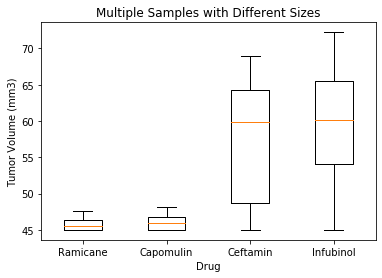

In [20]:
fig2, ax2 = plt.subplots()
ax2.set_title('Multiple Samples with Different Sizes')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Drug')

ax2.boxplot(drug_data, showfliers=True,flierprops=dict(markerfacecolor='g', marker='D'))
plt.xticks(np.arange(1, 5), most_promising)
plt.show()
#https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Change for Mouse g288')

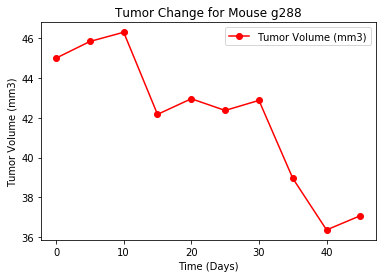

In [21]:
# Generate a line plot of time point versus tumor volume for *a mouse* treated with Capomulin
# What mouse?  Some random mouse I guess.
mice = mc_db.loc[mc_db['Drug Regimen'] == "Capomulin"]
randomMouseID = mice.sample(1)['Mouse ID']
mouse = mice.loc[mice["Mouse ID"] == randomMouseID.values[0]]

fig33, ax33 = plt.subplots()

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o',color='red', label="Tumor Volume (mm3)")

plt.legend(loc="upper right")
ax33.set_ylabel('Tumor Volume (mm3)')
ax33.set_xlabel('Time (Days)')
labeltext = 'Tumor Change for Mouse '
labeltext += str(randomMouseID.values[0])
ax33.set_title(label=labeltext)

In [22]:
mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
242,g288,0,45.000000,0,Capomulin,Male,3,19
474,g288,5,45.839400,0,Capomulin,Male,3,19
523,g288,10,46.304003,1,Capomulin,Male,3,19
727,g288,15,42.172301,1,Capomulin,Male,3,19
1083,g288,20,42.957120,1,Capomulin,Male,3,19


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266087,46.503052,46.541248,47.389175,46.796097,47.125587,47.248966,43.944859,47.470829,46.851818
10,43.084290,48.285126,49.403908,49.582268,48.694210,49.423328,49.101540,42.531956,49.335369,48.689880
15,42.064316,50.094055,51.296398,52.399975,50.933018,51.359741,51.067318,41.495060,51.448025,50.779060
20,40.716324,52.157047,53.197689,54.920937,53.644089,54.364418,53.346737,40.238323,53.970081,53.170334


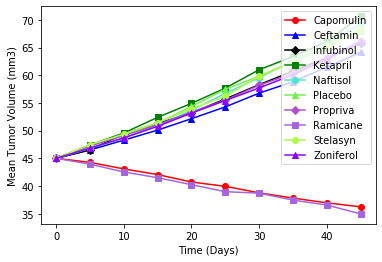

In [23]:
#here's some data on the tumor volume across the dataset.
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen','Timepoint'])
gd = mca_db.mean()

#because, who cares
del gd['Metastatic Sites']
del gd['Age_months']
del gd['Weight (g)']

def minorMunge(ed, title):
    drugs = ed.index.levels[0]
    timepoints = ed.index.levels[1]
    data = list(ed[title])

    import array as arr
    numbers_array = arr.array('f', data)
    numbers_array[0:len(timepoints)]

    df = pd.DataFrame()
    indx = 0
    endx = len(timepoints)
    for drug in drugs:
        df[drug] = numbers_array[indx:endx].tolist()
        indx += len(timepoints)
        endx += len(timepoints)

    df["Timepoint"] = timepoints
    df.set_index("Timepoint",inplace = True)
    
    return df

import random
def rc():
    r = lambda: random.randint(0,255)
    x = ('#%02X%02X%02X' % (r(),r(),r()))
    return x

df = minorMunge(gd,'Tumor Volume (mm3)')

drugs = df.keys()

colors = ['red','blue','black','green',rc(),rc(),rc(),rc(),rc(),rc()]
markers = ['o','^','D','s','o','^','D','s','o','^']

fig3, ax3 = plt.subplots()

for i in range(10): #if you want just Capomulin, change range to range(1)
    plt.plot(df.index, df[drugs[i]], marker = markers[i],color=colors[i], label=drugs[i] )

plt.legend(loc="upper right")
ax3.set_ylabel('Mean Tumor Volume (mm3)')
ax3.set_xlabel('Time (Days)')

df.head()

In [24]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capo['Weight (g)'],capo['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = capo['Weight (g)']
y_values = capo['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)

capo['predict'] = 20.29 * capo['Weight (g)'] - 364.52

plt.scatter(capo['Weight (g)'],capo['Tumor Volume (mm3)'])
plt.plot(capo['Weight (g)'],capo['predict'],"r-")

plt.show()


NameError: name 'capo' is not defined

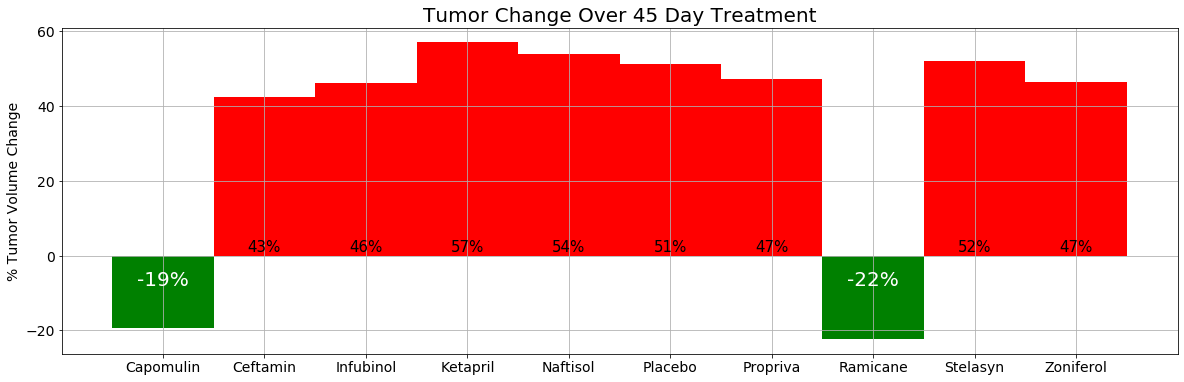

In [25]:
mcc_db = mc_db.copy()
mcc_db = mcc_db.groupby(['Drug Regimen','Timepoint'])
gd = mcc_db.mean()
gd.head()

timepoints = gd.index.levels[1]
drugs = gd.index.levels[0]
percchgdrug = {}

for drug in drugs:
    percent_change =  ((gd.loc[drug,timepoints.max()]['Tumor Volume (mm3)'] - gd.loc[drug,0]['Tumor Volume (mm3)']) / gd.loc[drug,0]['Tumor Volume (mm3)'])
    percent_change = percent_change * 100
    percchgdrug[drug] = percent_change
    
# Store all Relevant Percent Changes into a Tuple
pc = []
for d in percchgdrug:
   pc.append(percchgdrug[d])

cities = percchgdrug
p = tuple(pc)

colorbars = []
for px in p:
    if (px < 0):
        colorbars.append("g")
    else:
        colorbars.append("r")
        
x_axis = np.arange(len(percchgdrug))

fig4, ax4 = plt.subplots(figsize=(20,6))

plt.grid(True)
ax4.bar(x_axis, p, width = 1,color=colorbars, align="center")
ax4.set_title(label='Tumor Change Over 45 Day Treatment',fontsize=20)
plt.xticks(x_axis, percchgdrug,fontsize=14)
plt.yticks(np.arange(-20, 70, 20),fontsize=14)

ax4.set_ylabel('% Tumor Volume Change',fontsize=14)

i = 0
height = 0
labelcolor = ""
fontsz = 15
for px in p:
    if (px < 0):
        labelcolor = "white"
        height = -8
        fontsz = 20
    else:
        labelcolor = "black"
        height = 1
        fontsz = 15
    ax4.text(i,height, "{0:.0f}".format(px)+"%", fontsize=fontsz, ha='center',color=labelcolor)
    i=i+1
